In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [2]:
dtype_spec = {
    'Column14': 'str',
    'Column15': 'str',
    'Column16': 'str'
}

# Load the dataset with specified data types
Android_App = pd.read_csv("app.csv", dtype=dtype_spec, low_memory=False)

In [3]:
Android_App.head(5)

,Column1,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,user_reviews.Column1,user_reviews.Column2,user_reviews.Column3,user_reviews.Column4,user_reviews.Column5
0,1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0,Everyone 10+,Health & Fitness,2/17/2017,1.9,2.3.3 and up,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0,Everyone 10+,Health & Fitness,2/17/2017,1.9,2.3.3 and up,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0,Everyone 10+,Health & Fitness,2/17/2017,1.9,2.3.3 and up,10 Best Foods for You,NaN,NaN,NaN,NaN
3,1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0,Everyone 10+,Health & Fitness,2/17/2017,1.9,2.3.3 and up,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0,Everyone 10+,Health & Fitness,2/17/2017,1.9,2.3.3 and up,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
Android_App.shape

(70195, 19)

In [5]:
Android_App.columns


Index(['Column1', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'user_reviews.Column1',
       'user_reviews.Column2', 'user_reviews.Column3', 'user_reviews.Column4',
       'user_reviews.Column5'],
      dtype='object')

In [6]:
Android_App.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70195 entries, 0 to 70194
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Column1               70195 non-null  int64  
 1   App                   70195 non-null  object 
 2   Category              70195 non-null  object 
 3   Rating                68732 non-null  float64
 4   Reviews               70195 non-null  int64  
 5   Size                  48864 non-null  float64
 6   Installs              70195 non-null  int64  
 7   Type                  70195 non-null  object 
 8   Price                 70195 non-null  int64  
 9   Content Rating        70195 non-null  object 
 10  Genres                70195 non-null  object 
 11  Last Updated          70195 non-null  object 
 12  Current Ver           70187 non-null  object 
 13  Android Ver           70193 non-null  object 
 14  user_reviews.Column1  61556 non-null  object 
 15  user_reviews.Column

***Missing values***

In [7]:
Android_App.isnull().sum()

Column1                     0
App                         0
Category                    0
Rating                   1463
Reviews                     0
Size                    21331
Installs                    0
Type                        0
Price                       0
Content Rating              0
Genres                      0
Last Updated                0
Current Ver                 8
Android Ver                 2
user_reviews.Column1     8639
user_reviews.Column2    34266
user_reviews.Column3    34261
user_reviews.Column4    34261
user_reviews.Column5    34261
dtype: int64

In [8]:
# Fill missing values using assignment to avoid FutureWarning
Android_App['Rating'] = Android_App['Rating'].fillna(Android_App['Rating'].median())
Android_App['Size'] = Android_App['Size'].fillna(Android_App['Size'].median())
Android_App['Current Ver'] = Android_App['Current Ver'].fillna('Unknown')
Android_App['Android Ver'] = Android_App['Android Ver'].fillna('Unknown')


In [9]:
# Convert data types where necessary
Android_App['Last Updated'] = pd.to_datetime(Android_App['Last Updated'])
Android_App['Reviews'] = Android_App['Reviews'].astype(int)
Android_App['Installs'] = Android_App['Installs'].astype(int)
Android_App['Price'] = Android_App['Price'].astype(float)


In [10]:
# Remove duplicates
Android_App.drop_duplicates(inplace=True)

In [11]:
Android_App.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37829 entries, 0 to 70194
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Column1               37829 non-null  int64         
 1   App                   37829 non-null  object        
 2   Category              37829 non-null  object        
 3   Rating                37829 non-null  float64       
 4   Reviews               37829 non-null  int64         
 5   Size                  37829 non-null  float64       
 6   Installs              37829 non-null  int64         
 7   Type                  37829 non-null  object        
 8   Price                 37829 non-null  float64       
 9   Content Rating        37829 non-null  object        
 10  Genres                37829 non-null  object        
 11  Last Updated          37829 non-null  datetime64[ns]
 12  Current Ver           37829 non-null  object        
 13  Android Ver          

In [12]:
Android_App.shape

(37829, 19)

In [13]:
Android_App.isnull().sum()

Column1                    0
App                        0
Category                   0
Rating                     0
Reviews                    0
Size                       0
Installs                   0
Type                       0
Price                      0
Content Rating             0
Genres                     0
Last Updated               0
Current Ver                0
Android Ver                0
user_reviews.Column1    8639
user_reviews.Column2    9579
user_reviews.Column3    9574
user_reviews.Column4    9574
user_reviews.Column5    9574
dtype: int64

In [14]:
# Fill missing values in user reviews columns with "No review"
Android_App['user_reviews.Column1'] = Android_App['user_reviews.Column1'].fillna('No review')
Android_App['user_reviews.Column2'] = Android_App['user_reviews.Column2'].fillna('No review')
Android_App['user_reviews.Column3'] = Android_App['user_reviews.Column3'].fillna('No review')
Android_App['user_reviews.Column4'] = Android_App['user_reviews.Column4'].fillna('No review')
Android_App['user_reviews.Column5'] = Android_App['user_reviews.Column5'].fillna('No review')


In [15]:
Android_App.isnull().sum()

Column1                 0
App                     0
Category                0
Rating                  0
Reviews                 0
Size                    0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
user_reviews.Column1    0
user_reviews.Column2    0
user_reviews.Column3    0
user_reviews.Column4    0
user_reviews.Column5    0
dtype: int64

***Category Exploration***

In [16]:
# : Count the number of apps in each category
category_counts = Android_App['Category'].value_counts()

In [17]:
print("Number of apps in each category:\n", category_counts)

Number of apps in each category:
 Category
GAME                   5299
FAMILY                 3632
TOOLS                  2222
HEALTH_AND_FITNESS     1902
FINANCE                1674
TRAVEL_AND_LOCAL       1546
MEDICAL                1542
SPORTS                 1535
PRODUCTIVITY           1504
PERSONALIZATION        1336
DATING                 1256
LIFESTYLE              1200
PHOTOGRAPHY            1187
COMMUNICATION          1167
BUSINESS               1075
NEWS_AND_MAGAZINES      985
ENTERTAINMENT           926
SOCIAL                  899
SHOPPING                847
BOOKS_AND_REFERENCE     838
EDUCATION               762
FOOD_AND_DRINK          691
HOUSE_AND_HOME          518
VIDEO_PLAYERS           487
ART_AND_DESIGN          418
LIBRARIES_AND_DEMO      413
BEAUTY                  370
AUTO_AND_VEHICLES       368
MAPS_AND_NAVIGATION     320
PARENTING               316
WEATHER                 273
EVENTS                  219
COMICS                  102
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7524\2322039489.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index, x=category_counts.values, palette="viridis")


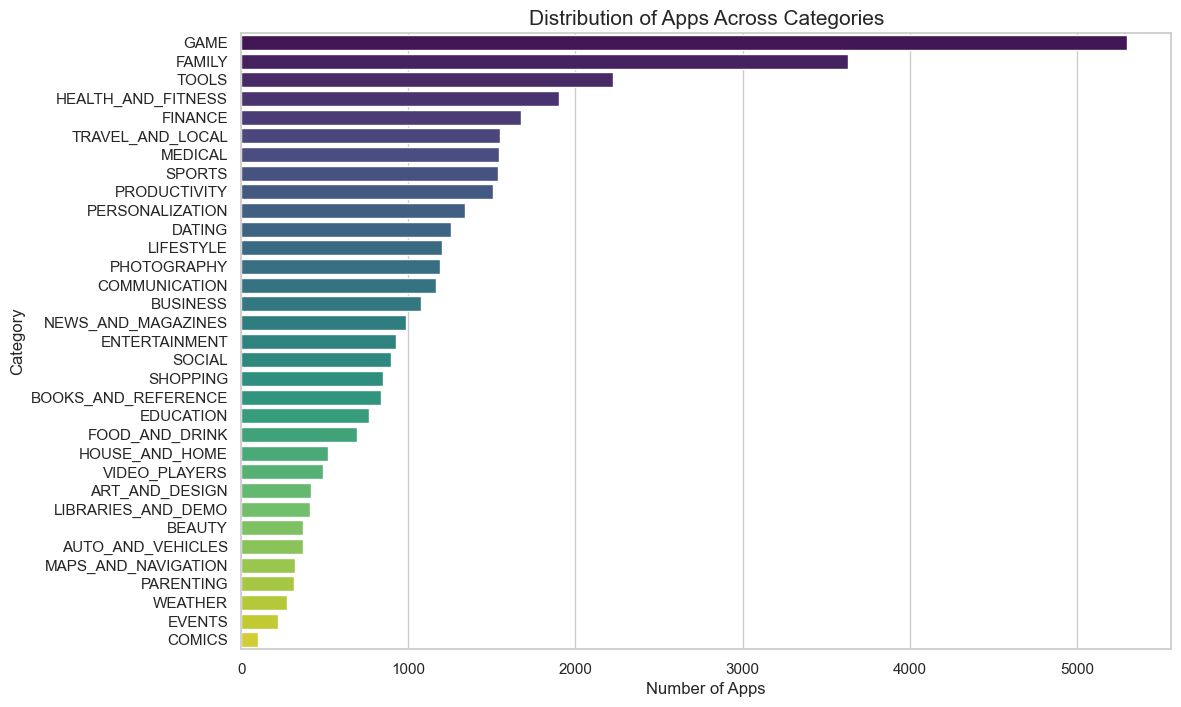

In [18]:
# Setting up the visualization style
sns.set(style="whitegrid")

# Plotting the distribution of apps across categories
plt.figure(figsize=(12, 8))
category_counts = Android_App['Category'].value_counts()
sns.barplot(y=category_counts.index, x=category_counts.values, palette="viridis")
plt.title('Distribution of Apps Across Categories', fontsize=15)
plt.xlabel('Number of Apps', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()


***Metrics Analysis***


C:\Users\HP\AppData\Local\Temp\ipykernel_7524\3450863855.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=Android_App, ax=axes[1, 1], palette='pastel')


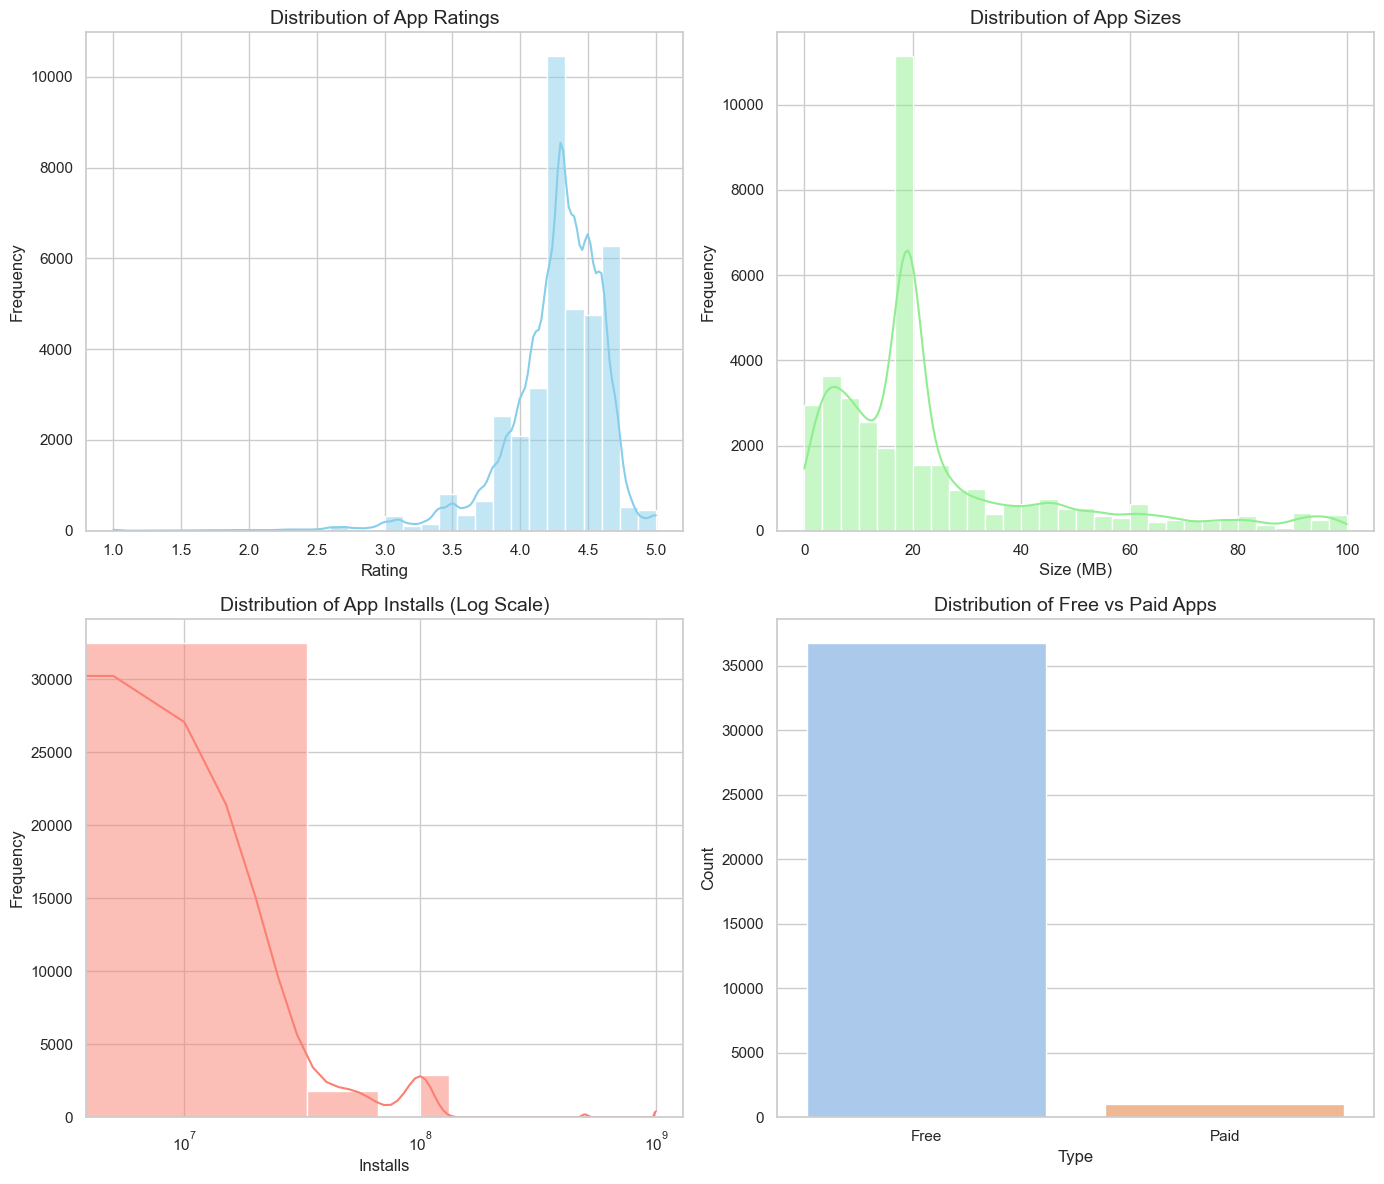

In [19]:
# Setting up a grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))


# 1. Distribution of App Ratings
sns.histplot(Android_App['Rating'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of App Ratings', fontsize=14)
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')

# 2. Distribution of App Sizes
sns.histplot(Android_App['Size'], bins=30, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution of App Sizes', fontsize=14)
axes[0, 1].set_xlabel('Size (MB)')
axes[0, 1].set_ylabel('Frequency')

# 3. Distribution of App Installs (log scale due to large values)
sns.histplot(Android_App['Installs'], bins=30, kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Distribution of App Installs (Log Scale)', fontsize=14)
axes[1, 0].set_xlabel('Installs')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xscale('log')  # Using log scale for better visualization

# 4. Distribution of App Pricing (Paid vs Free)
sns.countplot(x='Type', data=Android_App, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Distribution of Free vs Paid Apps', fontsize=14)
axes[1, 1].set_xlabel('Type')
axes[1, 1].set_ylabel('Count')


plt.tight_layout()
plt.show()

In [20]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment scores
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)

In [21]:
# Apply sentiment analysis on the 'Reviews' column (assuming it's the column with user reviews)
Android_App['sentiment_scores'] = Android_App['Reviews'].apply(lambda x: get_sentiment_score(str(x)))

# Extracting compound scores and categorizing them into positive, neutral, or negative sentiments
Android_App['sentiment'] = Android_App['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] > 0.05 
                                                               else ('negative' if x['compound'] < -0.05 
                                                                     else 'neutral'))


C:\Users\HP\AppData\Local\Temp\ipykernel_7524\3319254087.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


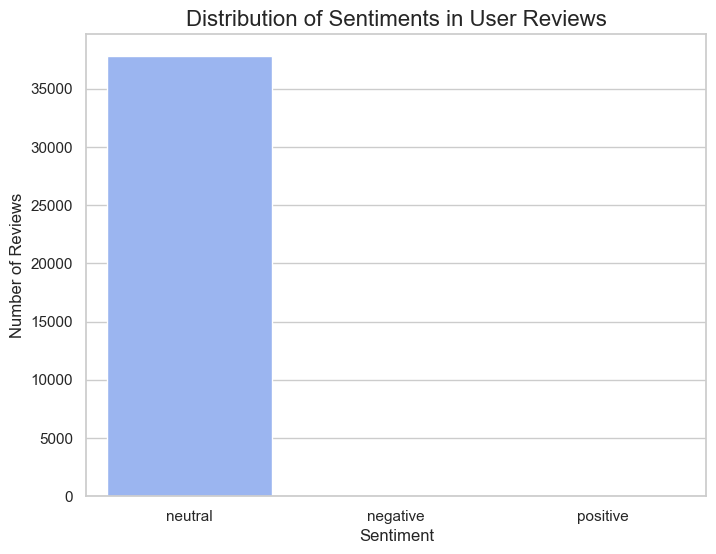

In [22]:
# Count the number of reviews in each sentiment category
sentiment_counts = Android_App['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Distribution of Sentiments in User Reviews', fontsize=16)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

***Visualisation***

***Top Categories by Number of Apps***

C:\Users\HP\AppData\Local\Temp\ipykernel_7524\1976298010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


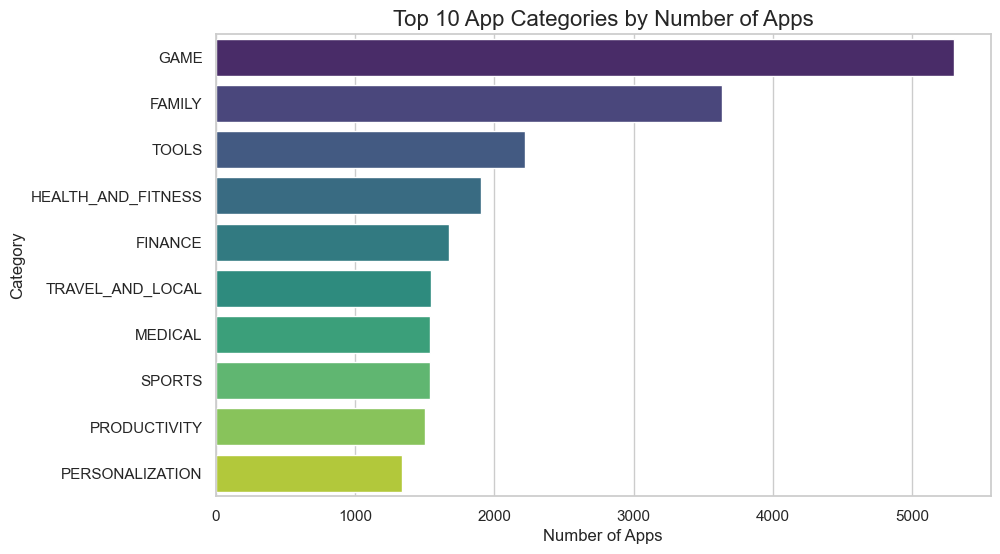

In [23]:
# Top Categories by Number of Apps
plt.figure(figsize=(10,6))
top_categories = Android_App['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 App Categories by Number of Apps', fontsize=16)
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

***Correlation Between Ratings and Installs***

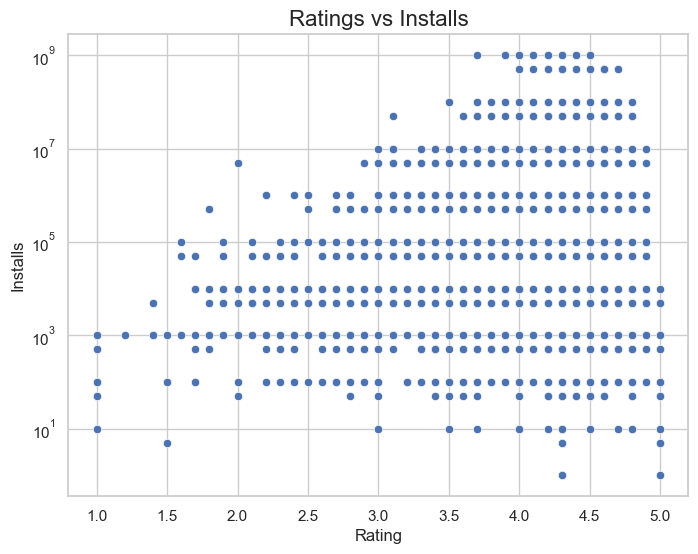

In [25]:
# Scatter plot for Ratings vs Installs
plt.figure(figsize=(8,6))
sns.scatterplot(x='Rating', y='Installs', data=Android_App)
plt.title('Ratings vs Installs', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.yscale('log')  # Log scale for better visualization due to large range in installs
plt.show()

***Distribution of Free vs Paid Apps by Category***

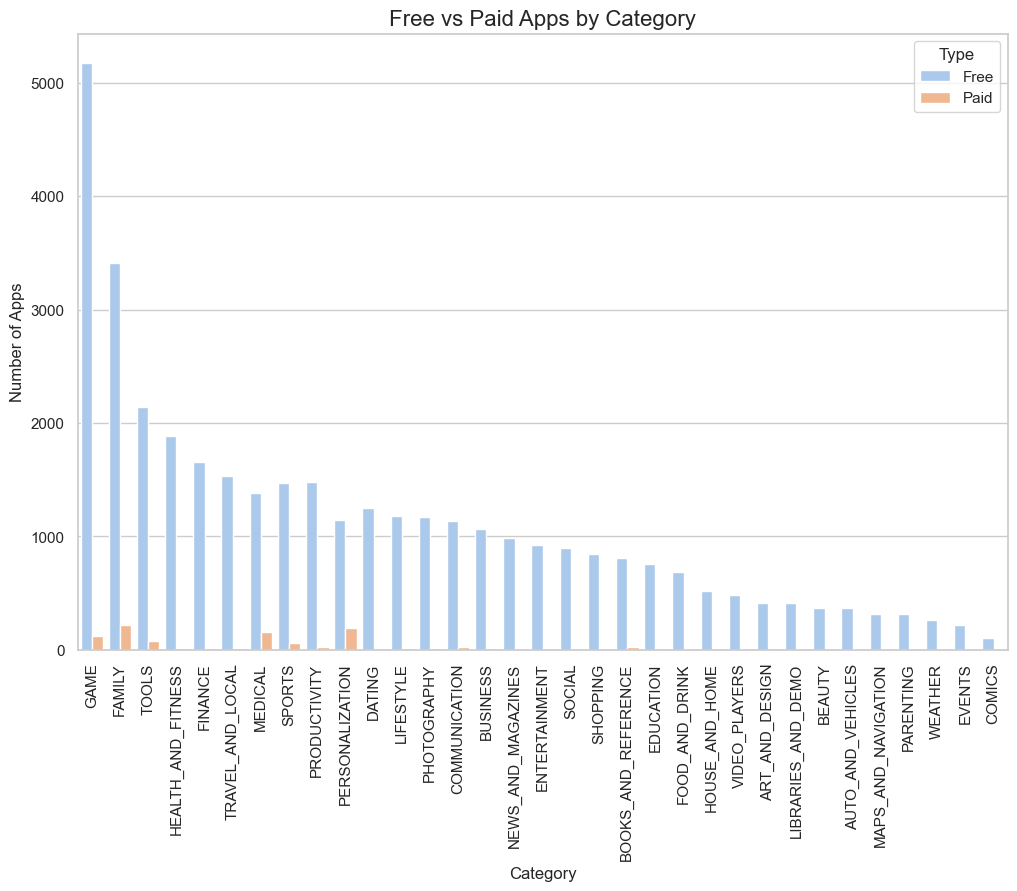

In [26]:
# Distribution of Free vs Paid Apps by Category
plt.figure(figsize=(12,8))
sns.countplot(x='Category', hue='Type', data=Android_App, palette='pastel', order=Android_App['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Free vs Paid Apps by Category', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()


***App Pricing Trends (Free vs Paid)***

C:\Users\HP\AppData\Local\Temp\ipykernel_7524\2708228863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Price', data=Android_App[Android_App['Price'] > 0], palette='coolwarm')


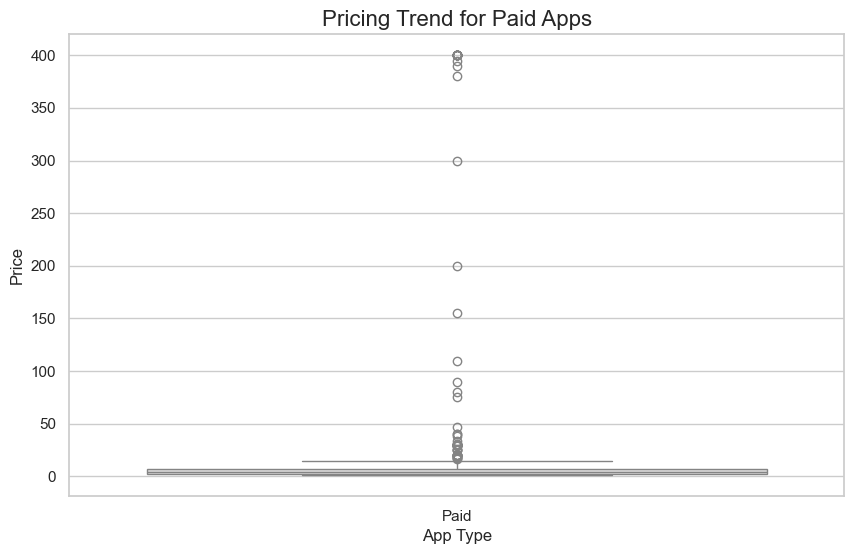

In [28]:
# Free vs Paid App Pricing Trend
plt.figure(figsize=(10,6))
sns.boxplot(x='Type', y='Price', data=Android_App[Android_App['Price'] > 0], palette='coolwarm')
plt.title('Pricing Trend for Paid Apps', fontsize=16)
plt.xlabel('App Type')
plt.ylabel('Price')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

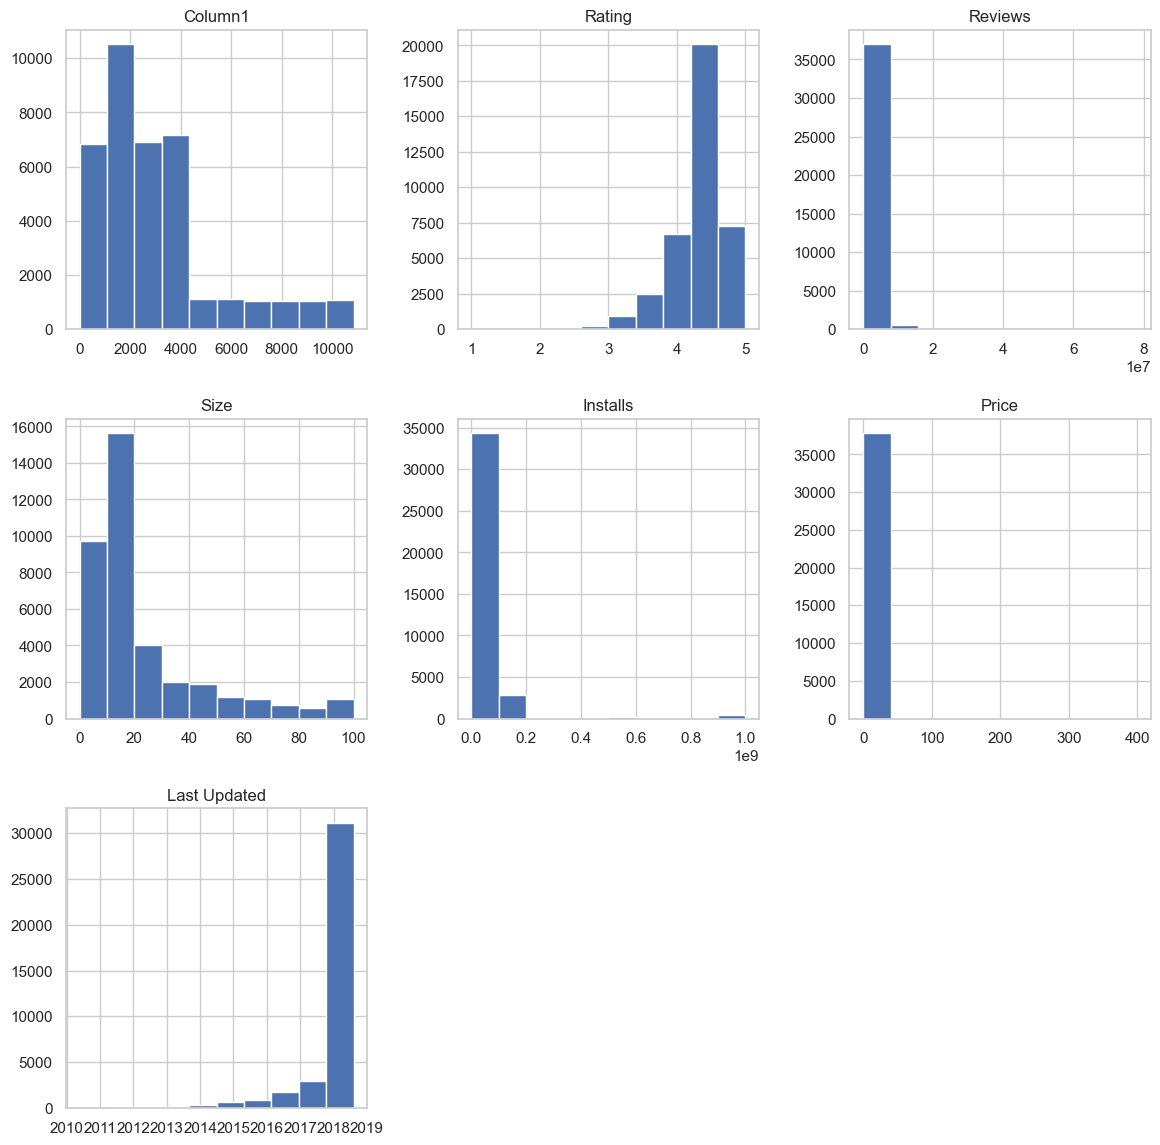

In [32]:
Android_App.hist(figsize=(14,14))
plt.show